In [1]:
%run ../../common/import_all.py

import cv2

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# The intensity histogram

The *intensity histogram* of an image is the histogram of its pixels' [intensities](../some-glossary.ipynb#Intensity) values. Typically the binning is given in such a way that each single intensity value is a bin, so we count the number of pixels with intensity value 0, the number of pixels with intensity value 1, ..., the number of pixels with intensity value 255.

The broader an intensity histogram is, the larger the contrast of the image as . 

## In OpenCV

We will here read our sample image and then we'll plot its intensity histograms, both for the grayscale version and for the 3 channels of the coloured one. You will see that due to the large amount of red in the image, the RED channel has its peak at a high intensity, while the GREEN channel is really peaked at low intensity.

### Read image, see its features

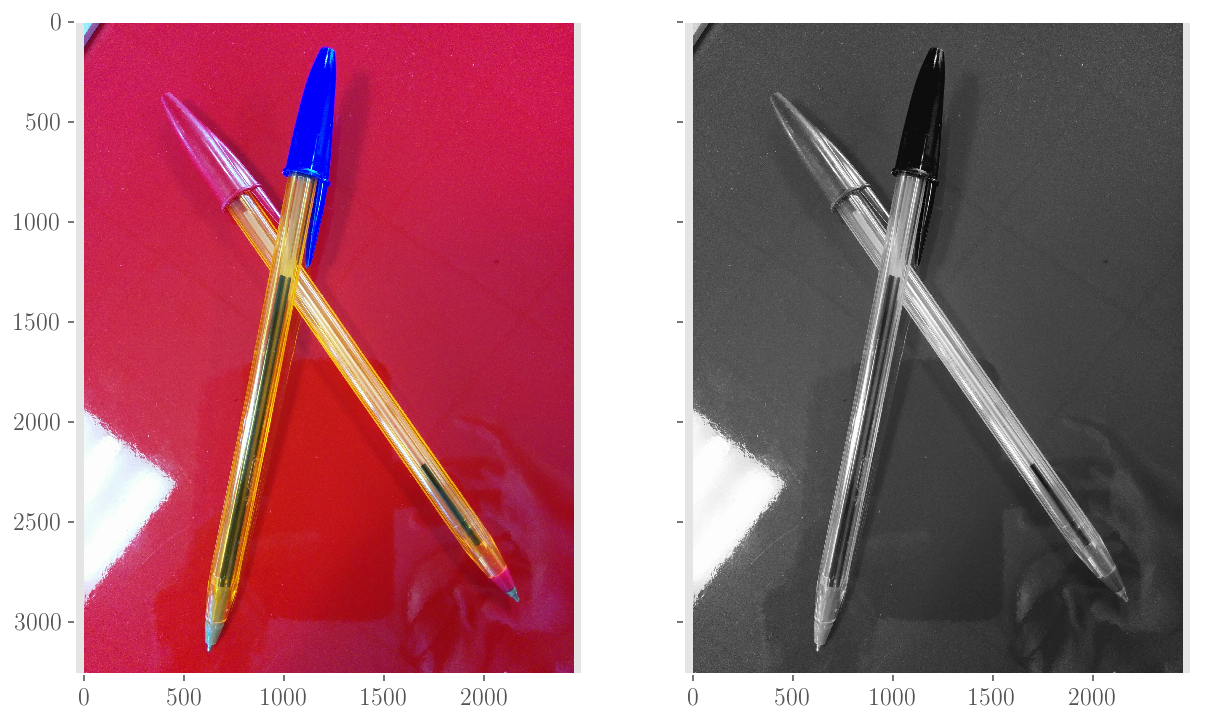

In [5]:
# First read an image
image = cv2.imread('../../imgs/pens.jpg')

# Transform into grayscale and into RGB (for Matplotlib)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show them both
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.grid()
ax1.imshow(RGB_image)

plt.gray()
ax2.grid()
ax2.imshow(gray)

plt.show();

In [39]:
# See image size and number of pixels

'Num of pixels',  image.size
'Size', image.shape

('Num of pixels', 23970816)

('Size', (3264, 2448, 3))

### Calculate and plot intensity histograms

In [54]:
# Hist of the gray image: channel 0, no mask, 256 pixels, range (0, 256)
gray_hist = cv2.calcHist([gray], [0], None, [256], (0, 256))  # the method can do multiple images at a time

# Hists of the color image, each channel, same args
R_hist = cv2.calcHist([RGB_image], [0], None, [256], (0, 256))
G_hist = cv2.calcHist([RGB_image], [1], None, [256], (0, 256))
B_hist = cv2.calcHist([RGB_image], [2], None, [256], (0, 256))

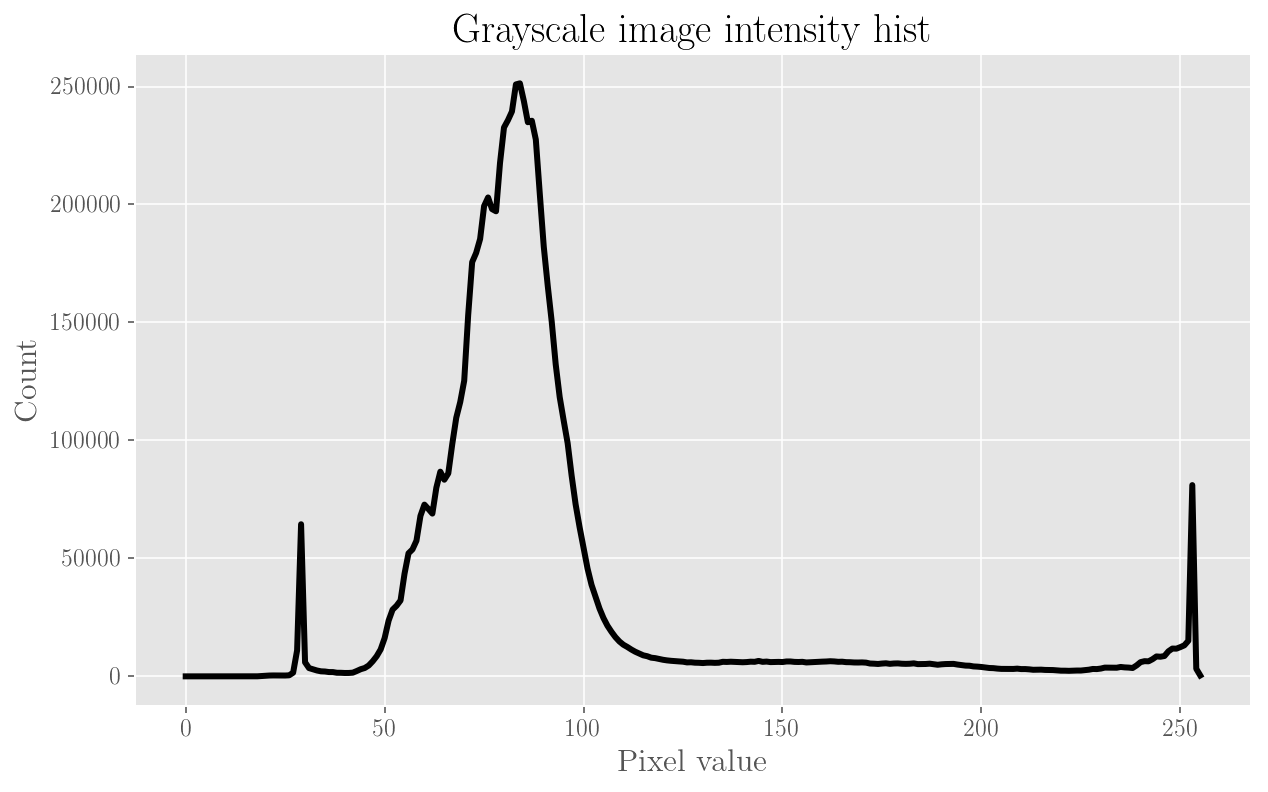

In [56]:
# Plot of the grayscale image hist
plt.plot(hist, c='k')
plt.title('Grayscale image intensity hist')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show();

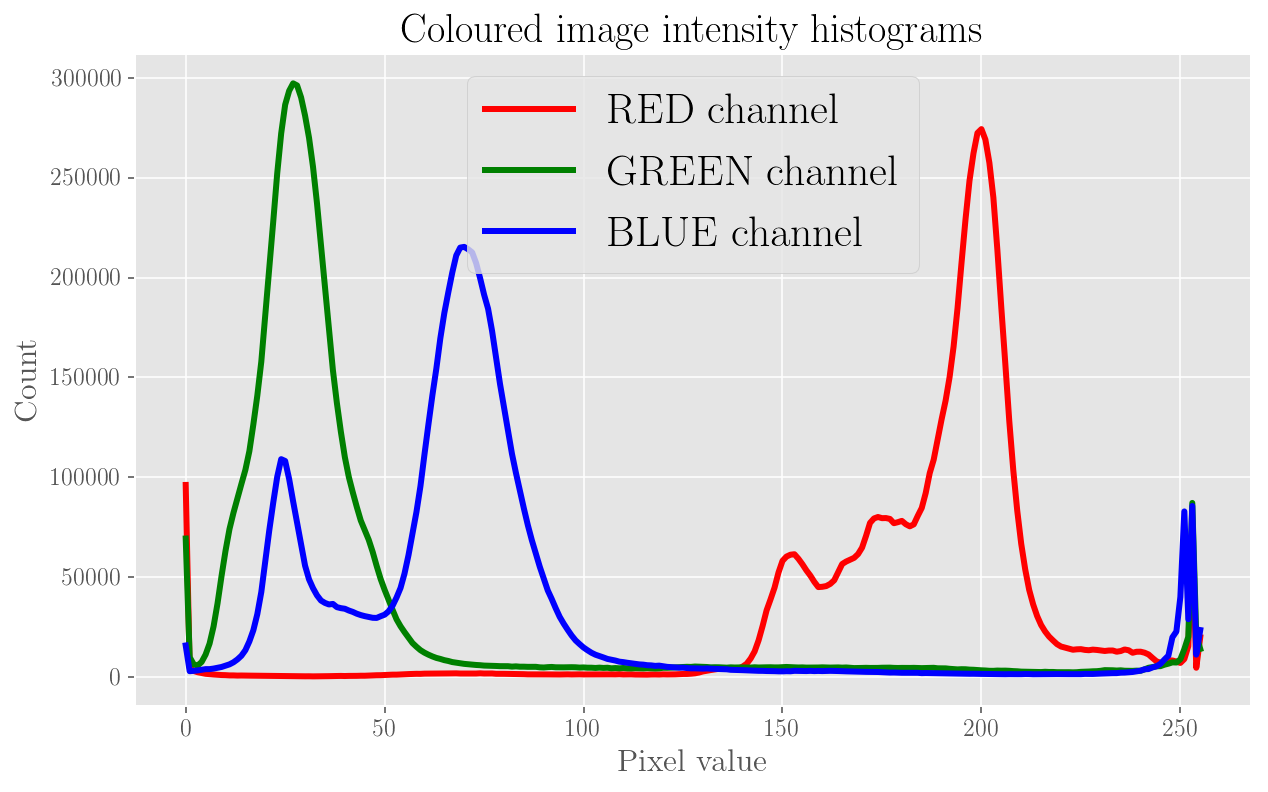

In [61]:
# Plot of the RGB image hists
plt.plot(R_hist, c='r', label='RED channel')
plt.plot(G_hist, c='g', label='GREEN channel')
plt.plot(B_hist, c='b', label='BLUE channel')

plt.title('Coloured image intensity histograms')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.legend()
plt.show();